# Image classification using supervised learning

## Description :

Throughout this notebook we will be dealing with several intial approach developed to form an idea to tackle image classification problem using computer vision and how these idea later on formed the basis for advanced algorithm and architectures in the field of computer vision.

## Overview

- Image Classification
- Image Classification using KNN
- Linear Classification
- Loss function


## Pre - requisites

- Python
- Numpy
- Machine learning

## Learning Outcomes

- Image classification
- Understanding the basic idea of linear classifier


# Chapter 1 : Image Classification

## 1.1 Motivation

In today's world at this point or say right at this minute millons of images are being uploaded, generated. This shows that how rapildy technology is improving, which is good but then along with this comes an issue as to how to handle such large amount of data efficiently. A large chunk of industries in today's world deal with somehwhat percentage of their data in visual format. So it get's next to impossible to segregate, organize, label these kind of data which is where machine learning comes to rescue. Use cases such as how to label the image data automatically by recognizing what is in the image, how to detect certain objects in an image etc. These problem statements are largely tackled in the sub field of computer vision called as image classification.


## 1.2 What is image classification?

The approach to solve above problems in computer vision domain began by thinking image in the form of pixel values representing a matrix which will be an input to a black box function. Consider this function is able to do the neccessary operations and return the label of an image. This in a nutshell is image classification.


Let's get our thoughts more clear in term of what image classification is by an example.

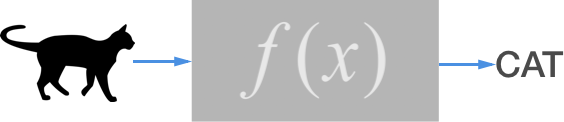
[resource](https://medium.com/@YearsOfNoLight/intro-to-image-classification-with-knn-987bc112f0c2l)


> Here the input image is given of a cat. Now, the task in Image Classification is to predict a single label (or a distribution over labels to indicate our confidence) for a given image. Keep that in mind that images are 3-dimensional arrays of integers from 0 to 255, of size Width x Height x 3. The 3 represents the three color channels Red, Green, Blue. Now this results in computing a large matrix with values with application of several image processing techniques and computer vison algorithm to acheive the desired label.

## 1.3 Challenges. 
This seems a pretty simple challenge but you don't realise what a human eye is able to achieve cannot be easily achieved with the help of computers. Our solution to the above image classification problem should be designed in such a way that it tackles certain variations and is able to generalise well giving it ability to behave closely with real world scenarios. Following are the variations we might consider that our algorithm should deal with -

- __Viewpoint variation__ A single object can be viewed from many different angles with respect to camera which is called as Viewpoint variation.
- __Scale variation__ Visual classes often exhibit variation in their size (size in the real world, not only in terms of their extent in the image).
- __Deformation__ Objects of interest need not be in same shape or may not remain that same rigid bodies, this is called as deformation.
- __Occlusion__ The objects of interest can be occluded. Sometimes only a small portion of an object (as little as few pixels) could be visible.
- __Illumination conditions__ The effects of illumination are drastic on the pixel level.
- __Background clutter__ The objects of interest may blend into their environment, making them hard to identify.
- __Intra-class variation__ The classes of interest can often be relatively broad, such as chair. There are many different types of these objects, each with their own appearance.

A good image classification model must be invariant to the cross product of all these variations, while simultaneously retaining sensitivity to the inter-class variations.

<img src=../images/challenges.jpeg>

## 1.4 Data-driven approach
There can be multiple solutions to approach this problem like we can classify rules to detect certain points of interest in our image and based on that we may conclude that the given image has this particular label associated with it.But its seems vague idea as one cannot right rules and keep on adding to identify more complex patterns this would turn out to be messy and not so scalable. Instead what we would do here is provide a labeled set of images and develop learning alogrithms to learn about the visual appearance of each class. This approach is referred to as a data-driven approach, since it relies on first accumulating a training dataset of labeled images

<img src=../images/trainset.jpg>

> An example training set for four visual categories. In practice we may have thousands of categories and hundreds of thousands of images for each category.

## 1.5 The image classification pipeline
We’ve seen that the task in Image Classification is to take an array of pixels that represents a single image and assign a label to it. Our complete pipeline can be formalized as follows:

- __Input__ Our input consists of a set of N images, each labeled with one of K different classes. We refer to this data as the training set.
- __Learning__ Our task is to use the training set to learn what every one of the classes looks like. We refer to this step as training a classifier, or learning a model.
- __Evaluation__ In the end, we evaluate the quality of the classifier by asking it to predict labels for a new set of images that it has never seen before. We will then compare the true labels of these images to the ones predicted by the classifier. Intuitively, we’re hoping that a lot of the predictions match up with the true answers (which we call the ground truth).

## 1.6 Practical approach

So the first phase is defined we need to gather training data to feed a learning alogorithm and then let that algorithm to rest of the work to predict the image label. For this we can use the existing machine learning algorithms for classification such as K- Nearest Neighbours, Support Vector Machine etc. Through out this notebook we will go through several machine learning alogithms and test their perfomance and generalizability in terms of handling visual data, this is an important exercise as we can know with respect to learning algorithm is their any scope of improving the existing algorithms and what are their shortcomings. Is their any need of new framework that would be able to processing image data better that existing machine learning algos.



# Chapter 2 :Image Classification Using KNN

As you guys have already studied K- Nearest Neighbours comes in one of the simplest algorithms. It is also called as dumb algorithm, due to its working nature that goes behind the scenes. KNN memorises all the training samples and just waits for testing samples to drop in which is when this algorithm wakes up and starts working on classifying the samples to one of the category.

### 2.1 Nearest Neighbor Classifier
**The CIFAR-10 Dataset** One popular image classification dataset is the <a href="http://www.cs.toronto.edu/~kriz/cifar.html">CIFAR-10 dataset</a>. This dataset consists of 60,000 tiny images that are 32 pixels high and wide. Each image is labeled with one of 10 classes (for example *"airplane, automobile, bird, etc"*). These 60,000 images are partitioned into a training set of 50,000 images and a test set of 10,000 images. In the image below you can see 10 random example images from each one of the 10 classes:

<img src="../images/nn.jpg"/>

> Left: Example images from the <a href="http://www.cs.toronto.edu/~kriz/cifar.html">CIFAR-10 dataset</a>. Right: first column shows a few test images and next to each are shown the top 10 nearest neighbors in the training set according to pixel-wise difference.

Suppose now that we are given the CIFAR-10 training set of 50,000 images (5,000 images for every one of the labels), and we wish to label the remaining 10,000. The nearest neighbor classifier will take a test image, compare it to every single one of the training images, and predict the label of the closest training image. The above image right side section shows how 10 test images of 10 different class leads to a predicted class of the image. After careful observation we can see that mostly 3 out 10 examples the actual classes are retrieved. For example in the 3rd row the nearest training image to an airplane is frog maybe because of the shape and orientation of a frog is somewhat similar to an airplane, hence this image would be mislabeled as frog.




Now, the question comes how to we compare these images. As we know images are comprised of pixels, each image in the CIFAR10 dataset is of dimension 32 x 32 x 3. Simplest approach to this problem is to compare images pixel by pixel and add up all the differences.

Which means we can represent two images as vectors \\( I_1, I_2 \\) , a reasonable choice for comparing them might be the **L1 distance**:

$$
d_1 (I_1, I_2) = \sum_{p} \left| I^p_1 - I^p_2 \right|
$$

```python
import numpy as np

class NearestNeighbor(object):
  def __init__(self):
    pass

  def train(self, X, y):
    """ X is N x D where each row is an example. Y is 1-dimension of size N """
    # the nearest neighbor classifier simply remembers all the training data
    self.Xtr = X
    self.ytr = y

  def predict(self, X):
    """ X is N x D where each row is an example we wish to predict label for """
    num_test = X.shape[0]
    # lets make sure that the output type matches the input type
    Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

    # loop over all test rows
    for i in xrange(num_test):
      # find the nearest training image to the i'th test image
      # using the L1 distance (sum of absolute value differences)
      distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
      min_index = np.argmin(distances) # get the index with smallest distance
      Ypred[i] = self.ytr[min_index] # predict the label of the nearest example

    return Ypred
```

**The choice of distance.** 
There are many other ways of computing distances between vectors. Another common choice could be to instead use the **L2 distance**, which has the geometric interpretation of computing the euclidean distance between two vectors. The distance takes the form:

$$
d_2 (I_1, I_2) = \sqrt{\sum_{p} \left( I^p_1 - I^p_2 \right)^2}
$$

Which means we would be computing the pixelwise difference as before, but this will be involving square of the distances followed by adding them upand finally taking the square root. 

In numpy we can compute **L2 distance** as following :- 

```python
distances = np.sqrt(np.sum(np.square(self.Xtr - X[i,:]), axis = 1))
```

### 2.2 k - Nearest Neighbor Classifier

Its not conclusive to use only the label of the nearest image when we wish to make a prediction. Instead of that we can compare the image with K closest images and have them vote on the label of the test image, hence the name **K-Nearest Neighbours**. In particular, when _k = 1_, we recover the Nearest Neighbor classifier. Intuitively, higher values of __k__ have a smoothing effect that makes the classifier more resistant to outliers:


<img src="../images/knn.jpeg">
    
> An example of the difference between Nearest Neighbor and a 5-Nearest Neighbor classifier, using 2-dimensional points and 3 classes (red, blue, green). The colored regions show the <b>decision boundaries</b> induced by the classifier with an L2 distance. The white regions show points that are ambiguously classified (i.e. class votes are tied for at least two classes). Notice that in the case of a NN classifier, outlier datapoints (e.g. green point in the middle of a cloud of blue points) create small islands of likely incorrect predictions, while the 5-NN classifier smooths over these irregularities, likely leading to better <b>generalization</b> on the test data (not shown). Also note that the gray regions in the 5-NN image are caused by ties in the votes among the nearest neighbors (e.g. 2 neighbors are red, next two neighbors are blue, last neighbor is green).

In practice, you will almost always want to use k-Nearest Neighbor.



### 2.3 Disadvantages of KNN

Though this algorithm is easiest to interpret and tune. It has some cons associated to it as well which are discussed as follows : -

- The classifier has to remember all of the training data and use it for prediction on the test data which is not so scalable approach as the data grows huge. 

- Due to its lazy learning approach the training time is significantly faster than testing time, hence classifying a test image is computationally expensive as it has to compare it with all training images. 

#### Task : Image classification using knn 
This task comprises of using CIFAR-10 dataset containing 10 different classes to predict with the help of lazy learning algorithm that is KNN.


#### Instructions
- Extract the data from the pickle files loaded earlier and concatenate to create training data for the model. Name the variable as `trainData`.
- Extract the labels from the pickle files loaded earlier and concatenate to create training data labels for the model. Name the variable as `trainLabels`.
- Since the data and the labels here are image and image labels hence, convert the data in float32 type and save it in the same.
- Instantiate the KNN model by using `cv2.ml.KNearest_create()` and save it to the varible named as `knn`. 

- Train the model on `trainData` and `trainLabels` such that each training sample is a row of samples.

- Find the nearest neighbours on the testing data by converting the test data into float 32 data type along with k set as 3.

- Compare the results predicted by the model which are classfied correctly and print out the accuracy.


In [3]:
# !wget 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
# !tar xvfz cifar-10-python.tar.gz
# !ls

# !pip3 install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

d1 = unpickle('../data/cifar-10-batches-py/data_batch_1')
d2 = unpickle('../data/cifar-10-batches-py/data_batch_2')
d3 = unpickle('../data/cifar-10-batches-py/data_batch_3')
d4 = unpickle('../data/cifar-10-batches-py/data_batch_4')
d5 = unpickle('../data/cifar-10-batches-py/data_batch_5')
t = unpickle('../data/cifar-10-batches-py/test_batch')

# Write your code here

trainData = np.concatenate([d1[b'data'], d2[b'data'], d3[b'data'], d4[b'data'], d5[b'data']])
trainLabels = np.concatenate([d1[b'labels'], d2[b'labels'], d3[b'labels'], d4[b'labels'], d5[b'labels']])

trainData = trainData.astype(np.float32)
trainLabels = trainLabels.astype(np.float32)

knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, trainLabels)

ret, results, neighbours ,dist = knn.findNearest(t[b'data'].astype(np.float32), k=3)

y = np.reshape(np.array(t[b'labels']), [-1,1])
np.sum(results==y)/y.shape[0]

0.3303

## Chapter 3 : Linear Classification

If problems in hand are solved with simplest alogrithm we need not go in further to devise complex methods but as we saw K-NN being quite simple and interpretable does not do well on large data. Which brings the need to devise more complex and robust algorithms. This approach image classification would consist of some machine learning algorithms which kind off followes the same methodology to solve this problem and then we will eventually naturally extend to entire Neural Networks and Convolutional Neural Networks.

The approach will have two major components: a **score function** that maps the raw data to class scores, and a **loss function** that quantifies the differences between the predicted scores and ground truth labels. Following we would try minmise the loss function by tuning certain hyperparmeters.


### 3.1 Parameterized mapping from images to label scores

The first part deals with defining a score function that maps the raw data (which is the pixel values of an image in this case) to confidence scores of each class.

Let's form an example around this ideology -

Assuming a training dataset of images \\( x_i \in R^D \\), each associated with a label \\( y_i \\). Here \\( i = 1 \dots N \\) and \\( y_i \in \{ 1 \dots K \} \\). That is, we have N examples (each with a dimensionality D) and K distinct categories. For example, in CIFAR-10 we have a training set of N = 50,000 images, each with D = 32 x 32 x 3 = 3072 pixels, and K = 10, since there are 10 distinct classes (dog, cat, car, etc). We will now define the score function \\(f: R^D \mapsto R^K\\) that maps the raw image pixels to class scores.

**Linear classifier.** - A simples possible function to carry out the linear mapping would be -

$$f(x_i, W, b) =  W x_i + b$$

In the above equation, we will be assuming that image \\(x_i\\) would be having shape of [D x 1] as all the pixel values are flattened out in a single column vector. With the help of linear algebra and matrix formation rules the  matrix W (which will be weights  will be of size [K x D] , and the vector b (of size [K x 1]) are the **parameters** of the function.

In our case the size of the matrices will be as follows 

- \\(x_i\\) contains the $x^{ith}$ image pixel values flattened into one single array i.e [3072 x 1]
- W will be of size (10 x 3072)  as we have 10 different classes (i.e K=10)
- bias vector b will be of size [10 X 1] 


With this approach the advantage is  :


- Since matrix multiplication are effective way of doing large computations we can notice that a single matrix mutiplication \\(W x_i\\) is effectively handles the evalution of K seprate classfiers simultaneously in parallel. Intutively you can imagine each classifier as row of **W**. 

- Although input data which is feeded into this linear classifier is fixed but we can control the parameters **W, b**. Mainly we will focus on how to adjust these parameters such that we minimize the difference between computed score and ground truth label or in other words how to we tune these parameters in order to get close to real world scenarios across the whole training set which sums up saying that correct class should have higher scores than incorrect classes.

- We learn parameters such as **W, b** in training phase and once the learning is complete we can discard the data and apply learned parameters over the test data which can be classified based on the computed scores learned while training. Also while testing phase it involves a single matrix operation iteration which is significantly faster than KNN's lazy learning way.



### 3.2 Interpreting a linear classifier

Linear classifier behaves by first calculating the the weighted sum of all of its pixel values across the three channels and then assigning the final scores to that class. So intializing the linear classifier with some weights would result in favour or disfavour (depending on the sign of the weights) to certain colour at certain positions in our image. 

Let's understand this by an example- 


<img src="../images/linear_classifier.png">

> Consider the above image an assume that for the sake of simplicity we are considering only three pixels (3 monochrome pixels as we are not considering color channels in this example for simplicity), and we have binary classes (one class assigned for dog and another class assigned for cat). We stretch the image pixels into a column and perform matrix multiplication to get the scores for each class. Here our set of weights actually turn out to be good as it is assigning a higher importance to the correct class as compared to incorrect class.


**Analogy of images as high-dimensional points.** - We can see images as having dimesions as 32 x 32 x 3  or we can imagine that these images are streched into high dimensional vector space with 3072 dimensions (3072 = 32 x 32 x 3). Each of the image can be mapped onto this high dimensional vector space as  one point. Analogously, the entire dataset is a (labeled) set of points.

<img src="../images/pixelspace.jpeg">

> Although we cannot imagine or visualise 3072 dimensional spaces if we somehow squash them and visualise only in two dimension and then we can try to visualize what the classifier might be doing which is what we can see from the above image. Here each image is behaving as a point. The green classfier assign scores to each image falling in that 2D space and the direction determines whether the score are linearly increasing (downward direction instances are assigned postive scores) or linearly decreasing (upward direction instances are assigned negative scores).

As we saw above, every row of \\(W\\) is a classifier for one of the classes. The geometric interpretation of these numbers is that as we change one of the rows of \\(W\\), the corresponding line in the pixel space will rotate in different directions. The biases \\(b\\), on the other hand, allow our classifiers to translate the lines. In particular, note that without the bias terms, plugging in \\( x_i = 0 \\) would always give score of zero regardless of the weights, so all lines would be forced to cross the origin.


### 3.3 Interpreting a linear classifier as template matching

In above case the weight matrix was containing the actual image as a whole to feed into a linear classifier, but there can be a different type of interpretation of weights __W__ such that the row of it corresponds to a template (or say a prototype ) for one of the classes. Now, each template is compared against the image using an inner dot product and computes a score accordingly. This is an iterative process which goes on until it founds a best fit.


We can grab the basic intution of how template matching works by getting a hands on experience using OpenCV -

```python
# Importing necessary libraries
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

# creating a template
template = cv2.imread('../images/cod_poster_logo.jpg')
crop_gs = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY) #converting normal BRG format to grayscale

edge = cv2.Canny(crop_gs, 400, 150) #using canny edge detectors with thresholds as 50 and 200
kernel = np.ones((3,3),np.uint8) #defining a convolutional kernel for dilation of edges
final_template = cv2.dilate(edge, kernel,iterations = 1) # dilating edges to get them more highlighted

w, h = final_template.shape[::-1]
plt.imshow(final_template, 'gray')

```

Output: Orignal Image - 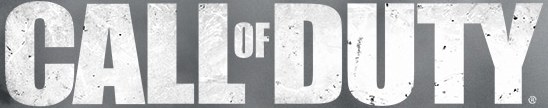

Template Created - 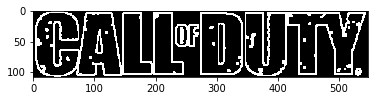



Now let's see how our template that is created in the above step performs to detect that region in a new image

```python
cod_poster_1 = cv2.imread('../images/cod_poster.jpg', 0)
cod_poster_copy_1 = cod_poster_1.copy()

res = cv2.matchTemplate(cod_poster_copy_1, edge, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(cod_poster_copy_1, top_left, bottom_right, (0,0,0), 3)

plt.imshow(cod_poster_copy_1, 'gray')
```

Output: 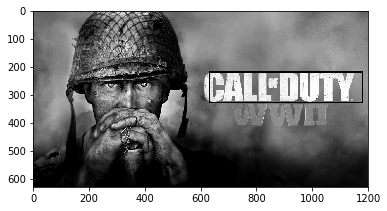

The above technique is called as template matching which performs a method of searching and finding the location of template image in a larger image. The `cv2.matchTemplate()` functionality of OpenCV is slides the template image over larger image by comparing each protion of the larger image. It returns a grayscale image, where each pixel denotes how much does the neighbourhood of that pixel match with template.

If input image is of size (WxH) and template image is of size (wxh), output image will have a size of (W-w+1, H-h+1). Once you got the result, you can use cv.minMaxLoc() function to find where is the maximum/minimum value. Take it as the top-left corner of rectangle and take (w,h) as width and height of the rectangle. That rectangle is your region of template. Hence, this is another way you can interpret weight matrix.

### Task 
Finding waldo is a game of finding a waldo named character in a picture which is filled up with noise


There is a given template image of image 

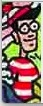
 
 
And here is the puzzle where you have to find the given character using template matching

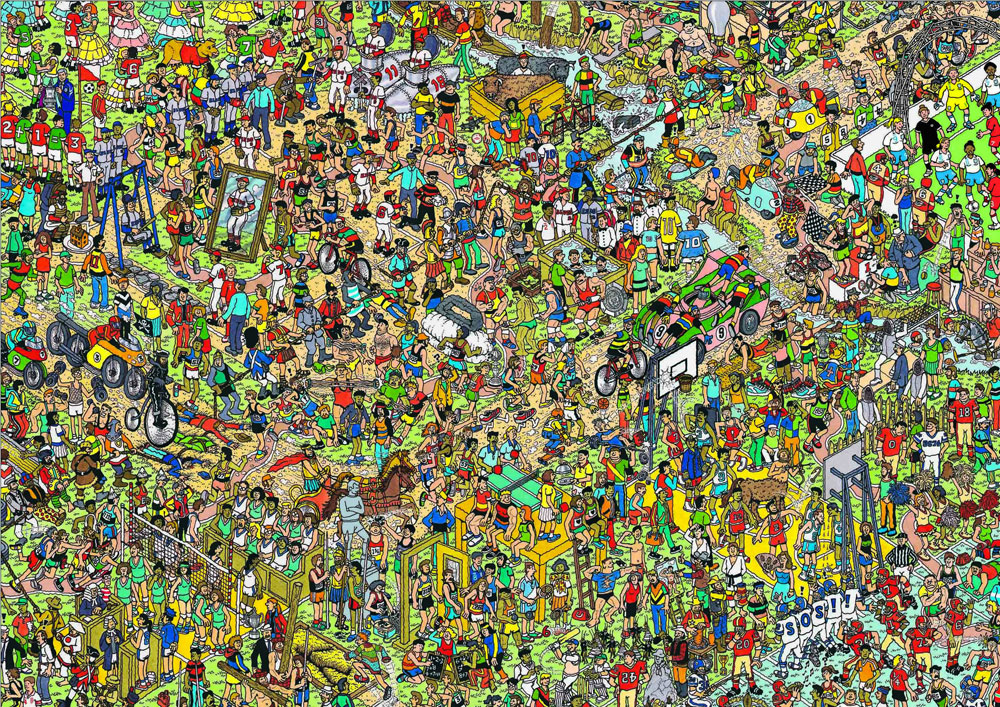


Output : 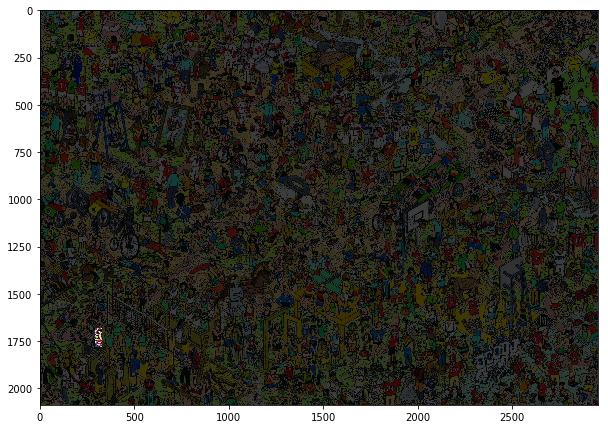


#### Instruction

- Extract the height and weight of the waldo image and store it as `waldoHeight` and `waldoWidth`.
- Use `cv2.matchTemplate` functionality to match the template `waldo` in `puzzle` and store the result in the variable named as `result`.
- Extract `minLoc` and `maxLoc` positions of the template that matched with our `result`.
- Calculate the bounding box of waldo and extract him from the puzzle by computing `topLeft` and `botRight` location on the basis of `maxLoc`. 

- Define region of interest as bounding box computed in the above step on the image `puzzle`.
- Create a mask(by adding numpy zeros) or a darkened transparent layer(by blending image using `cv2.addWeighted`)to darken everything in the puzzle except for waldo.

- Add the region of interest(i.e. waldo) on the top of darkened transparent image that is created above to highlight the waldo.
- Show the resultant image.

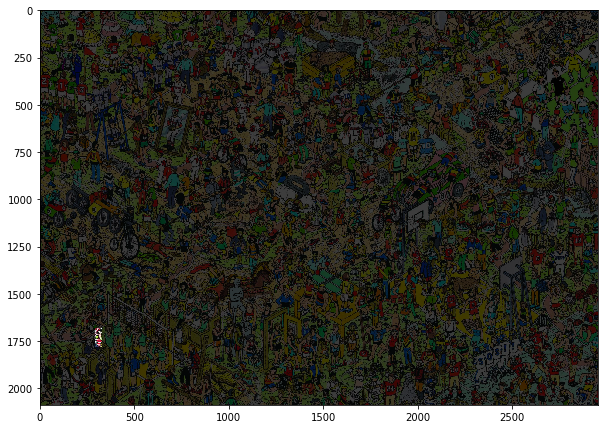

In [32]:
import imutils
puzzle = cv2.imread('../images/puzzle.png')
waldo = cv2.imread('../images/waldo.png')

# Write your code here 

(waldoHeight, waldoWidth) = waldo.shape[:2]


result = cv2.matchTemplate(puzzle, waldo, cv2.TM_CCOEFF)
(_, _, minLoc, maxLoc) = cv2.minMaxLoc(result)


# grab the bounding box of waldo and extract him from
# the puzzle image
topLeft = maxLoc
botRight = (topLeft[0] + waldoWidth, topLeft[1] + waldoHeight)
roi = puzzle[topLeft[1]:botRight[1], topLeft[0]:botRight[0]]
 
# construct a darkened transparent 'layer' to darken everything
# in the puzzle except for waldo
mask = np.zeros(puzzle.shape, dtype = "uint8")
puzzle = cv2.addWeighted(puzzle, 0.25, mask, 0.75, 0)

# put the original waldo back in the image so that he is
# 'brighter' than the rest of the image
puzzle[topLeft[1]:botRight[1], topLeft[0]:botRight[0]] = roi
 
# display the images
plt.figure(figsize= (10,10))

plt.imshow(cv2.cvtColor(puzzle, cv2.COLOR_BGR2RGB))

# Code ends here

### 3.4 Loss function
We have discussed that instead of memorising the data as it is, interpreting with a linear classifier and learning the weights provided an improved approach towards image classfication problem. But with every algorithm or approach designed to tackle this problem there comes a step to evaluate how good your algorithm or approach is. Here we achieve that step by defining a loss function. As we know we don't have any control over the data that is specified as it is a fixed entity. But we do have control over the parameters (**W,b**) here.

**Multiclass Support Vector Machine loss**

Loss function can be manipulated and changed which is why we are having several variation of loss functions in machine learning or say data science domain. One such loss function we will be discussing about is multiclass support vector machine loss (**SVM** loss). Multiclass deals with data having more than two output classes to predict as we saw above that CIFAR-10 data set contains 10 output classes to predict given an image as input.


SVM loss works in a way in which it provides score to each class such that it wants the correct class for each image to have a higher score as compared to incorrect class , but with a fixed margin of \\(\Delta\\). Let's dwell a little deep on SVM loss. Suppose for $i^{th}$ example we are given the pixels of image as \\(x_i\\) and the label \\( y_i \\) that specifies the index of the correct class. Now the linear classifier takes in the pixel values and calculates the \\( f(x_i, W, b) \\) which gives out class scores. These class scores can be abbriviated as \\(s\\). Similarily for this same image several class scores would be resulted out depending upon how many classes are there actually.

<img src="../images/margin.jpg">



Hence, the score for the j-th class is the j-th element: \\( s_j = f(x_i, W)_j \\). The Multiclass SVM loss for the i-th example is then formalized as follows:


$$
L_i = \sum_{j\neq y_i} \max(0, s_j - s_{y_i} + \Delta)
$$


![hinge_loss.png](attachment:hinge_loss.png)

**Example.** Here is an example to make you understand how each loss is calculated. Consider we have three classes and  the scores come out to be  \\( s = [13, -7, 11]\\), moreover the first class is the true class (i.e. \\(y_i = 0\\)). Also assume that \\(\Delta\\) is 10. The expression above sums over all incorrect classes (\\(j \neq y_i\\)), so we get two terms:

$$
L_i = \max(0, -7 - 13 + 10) + \max(0, 11 - 13 + 10)
$$

You can see that the first term gives zero since [-7 - 13 + 10] gives a negative number, which is then thresholded to zero with the \\(max(0,-)\\) function. We get zero loss for this pair because the correct class score (13) was greater than the incorrect class score (-7) by at least the margin 10. In fact the difference was 20, which is much greater than 10 but the SVM only cares that the difference is at least 10; Any additional difference above the margin is clamped at zero with the max operation. The second term computes [11 - 13 + 10] which gives 8. That is, even though the correct class had a higher score than the incorrect class (13 > 11), it was not greater by the desired margin of 10. The difference was only 2, which is why the loss comes out to 8 (i.e. how much higher the difference would have to be to meet the margin). In summary, the SVM loss function wants the score of the correct class \\(y_i\\) to be larger than the incorrect class scores by at least by \\(\Delta\\) (delta). If this is not the case, we will accumulate loss.



**Regularization**. There is a problem with the loss function described above which is if we set our weights **W** such that  
it correctly classifies every example (i.e. all scores are so that all the margins are met, and \\(L_i = 0\\) for all i).
Since this set of weights are not unique and there can be other instances where in you might get other set of weights which might classify the samples correctlty, hence the confusion arise to choose which set of parameters.

So our aim here is to remove this ambiguity and pickout a certain weight preferring over others. We can do this by incorporating a penalty in the loss function which is known as regularisation penalty \\(R(W)\\).

Following type of regularization penalty is called as **L2 NORM** -

$$
R(W) = \sum_k\sum_l W_{k,l}^2
$$

The above equation represents summing up the squared values of weights (\\(W\\)) hence the regularization function is only dependent on weights leading to a complete multiclass SVM loss. Below is the equation (after consideration of regularization penalty) of complete multiclass SVM loss -

$$
L =  \underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \lambda R(W) }_\text{regularization loss} \\\\
$$


Where \\(N\\) is the number of training examples. As you can see, we append the regularization penalty to the loss objective, weighted by a hyperparameter \\(\lambda\\). There is no simple way of setting this hyperparameter and it is usually determined by cross-validation.

Let's us take an example of how actually the ambiguity problem is taken care with the help of regularization. Suppose that we have some input vector \\(x = [1,1,1,1] \\) and two weight vectors \\(w_1 = [1,0,0,0]\\), \\(w_2 = [0.25,0.25,0.25,0.25] \\). Then \\(w_1^Tx = w_2^Tx = 1\\). Now both weight vectors are having a dot product eqaul to 1, whereas the L2 penalty of \\(w_1\\) is 1.0 while the L2 penalty of \\(w_2\\) is only 0.25. So model would prefer the weight vector which would achieve less regularization loss since **L2** norm prefers weights to be smaller and diffused which is exactly the case in second weight vector.


You may be wondering why we have not included bias in the loss function. Well there is no hard and fast rule to exclude bias but intutively bias does not have the same effects on the scores as the weight vectors do. Hence biases are not included commonly while encorporating regularization. But in practice even if you include the biases it is observed to be having a negligible effect.


**Code**. Here is the loss function (without regularization) implemented in Python, in both unvectorized and half-vectorized form:

```python
def L_i(x, y, W):
  """
  unvectorized version. Compute the multiclass svm loss for a single example (x,y)
  - x is a column vector representing an image (e.g. 3073 x 1 in CIFAR-10)
    with an appended bias dimension in the 3073-rd position (i.e. bias trick)
  - y is an integer giving index of correct class (e.g. between 0 and 9 in CIFAR-10)
  - W is the weight matrix (e.g. 10 x 3073 in CIFAR-10)
  """
  delta = 1.0 # see notes about delta later in this section
  scores = W.dot(x) # scores becomes of size 10 x 1, the scores for each class
  correct_class_score = scores[y]
  D = W.shape[0] # number of classes, e.g. 10
  loss_i = 0.0
  for j in xrange(D): # iterate over all wrong classes
    if j == y:
      # skip for the true class to only loop over incorrect classes
      continue
    # accumulate loss for the i-th example
    loss_i += max(0, scores[j] - correct_class_score + delta)
  return loss_i

def L_i_vectorized(x, y, W):
  """
  A faster half-vectorized implementation. half-vectorized
  refers to the fact that for a single example the implementation contains
  no for loops, but there is still one loop over the examples (outside this function)
  """
  delta = 1.0
  scores = W.dot(x)
  # compute the margins for all classes in one vector operation
  margins = np.maximum(0, scores - scores[y] + delta)
  # on y-th position scores[y] - scores[y] canceled and gave delta. We want
  # to ignore the y-th position and only consider margin on max wrong class
  margins[y] = 0
  loss_i = np.sum(margins)
  return loss_i

def L(X, y, W):
  """
  fully-vectorized implementation :
  - X holds all the training examples as columns (e.g. 3073 x 50,000 in CIFAR-10)
  - y is array of integers specifying correct class (e.g. 50,000-D array)
  - W are weights (e.g. 10 x 3073)
  """
  # evaluate loss over all examples in X without using any for loops
  # left as exercise to reader in the assignment
```

The takeaway from this section is that the SVM loss takes one particular approach to measuring how consistent the predictions on training data are with the ground truth labels. Additionally, making good predictions on the training set is equivalent to minimizing the loss.

> All we have to do now is to come up with a way to find the weights that minimize the loss.

**Setting Delta.** Note that we brushed over the hyperparameter \\(\Delta\\) and its setting. What value should it be set to, and do we have to cross-validate it? It turns out that this hyperparameter can safely be set to \\(\Delta = 1.0\\) in all cases. The hyperparameters \\(\Delta\\) and \\(\lambda\\) seem like two different hyperparameters, but in fact they both control the same tradeoff: The tradeoff between the data loss and the regularization loss in the objective. The key to understanding this is that the magnitude of the weights \\(W\\) has direct effect on the scores (and hence also their differences): As we shrink all values inside \\(W\\) the score differences will become lower, and as we scale up the weights the score differences will all become higher. Therefore, the exact value of the margin between the scores (e.g. \\(\Delta = 1\\), or \\(\Delta = 100\\)) is in some sense meaningless because the weights can shrink or stretch the differences arbitrarily. Hence, the only real tradeoff is how large we allow the weights to grow (through the regularization strength \\(\lambda\\)).


#### SVM in OpenCV

```python
svm = cv2.ml.SVM_create()
svm.setKernel(cv.ml.SVM_LINEAR)
svm.setType(cv.ml.SVM_C_SVC)
svm.train(trainData, cv.ml.ROW_SAMPLE, responses)
svm.save('svm_data.dat')

result = svm.predict(testData)[1]
```

### 3.5 Softmax Classifier

Since SVM classifier being more robust is more favourable choice of classifier out of two that we have discussed above. There is one more classifier which is called as softmax classifier which treats the outputs \\(f(x_i,W)\\) as (uncalibrated and possibly difficult to interpret) scores for each class, the Softmax classifier gives a slightly more intuitive output (normalized class probabilities) and also has a probabilistic interpretation that we will describe shortly. In the Softmax classifier, the function mapping \\(f(x_i; W) =  W x_i\\) stays unchanged, but we now interpret these scores as the unnormalized log probabilities for each class and replace the *hinge loss* with a **cross-entropy loss** that has the form:

$$
L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right) \hspace{0.5in} \text{or equivalently} \hspace{0.5in} L_i = -f_{y_i} + \log\sum_j e^{f_j}
$$

where we are using the notation \\(f_j\\) to mean the j-th element of the vector of class scores \\(f\\). As before, the full loss for the dataset is the mean of \\(L_i\\) over all training examples together with a regularization term \\(R(W)\\). The function \\(f_j(z) = \frac{e^{z_j}}{\sum_k e^{z_k}} \\) is called the **softmax function**.

Softmax classifier takes in a vector of arbitary real valued scores (in \\(z\\)) and sqaushes it to a vector of values between zero and one which finally sums upto one. 